In [1]:
import sys
sys.path.append("../")
import numpy as np
from pyunlocbox import functions
import matplotlib.pyplot as plt
import varprons as vpns
from regularizers import TV, pos
from applications import Tomography

## Example 1

In [2]:
k = 50
n = 50
m = 50
s = np.linspace(-1.5,1.5,m)
theta = np.linspace(0,2*np.pi,k)

rng = np.random.default_rng(seed=6)

yt = np.zeros((n,n))
yt[10:20,20:40] = 1
yt[30:45,5:20] = .8
yt[34:40,35:40] = 1.5
yt = yt.flatten()
xt = np.concatenate((.05*rng.normal(size=k),.05*rng.normal(size=k)))

# create instance
example1 = Tomography(s,theta,xt,yt,sigma=1)


# objective
f = lambda x,y : example1.misfit(x = x,y = y)
r1 = functions.dummy()
r2 = pos()

# optimization parameters
Lyy = np.linalg.norm(example1.getA(xt),ord=2)**2
L = 1e6
Lb = 1e6
otol = (f(xt,yt) + r1.eval(xt) + r2.eval(yt))*1.1
itol = 1e-6
maxit = 50
rho = 1

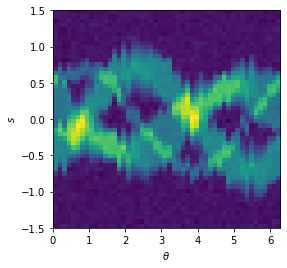

In [3]:
fig,ax=example1.plot_data()
plt.savefig('./results/tomo1_sinogram.eps',dpi=300,bbox_inches='tight')

In [4]:
# initial points
x0 = np.zeros(2*k)
y0 = example1.inner_solve(x0,np.zeros(n*n),rtol=1e-3,r2=r2)

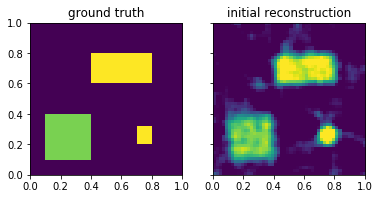

In [5]:
fig,ax = example1.plot_results([(xt,yt),(x0,y0)],['ground truth','initial reconstruction'])
plt.savefig('./results/tomo1_initial_reconstruction.eps',dpi=300,bbox_inches='tight')

In [6]:
# algorithm1
res1 = vpns.algorithm1(f,r1,r2,x0,y0,L=(L,L),tol=otol,maxit = 10*maxit)
x1 = res1['sol'][0]
y1 = res1['sol'][1]

# algorithm 2
res2 = vpns.algorithm2(f,r1,r2,x0,y0,L=(Lb,Lyy),tol=(otol,itol),maxit=(maxit,100))
x2 = res2['sol'][0]
y2 = res2['sol'][1]

# algorithm 3 adaptive, 1*rho
res3 = vpns.algorithm3(f,r1,r2,x0,y0,L=(Lb,Lyy),rho = 1*rho, tol=otol,maxit=(maxit,1000))
x3 = res3['sol'][0]
y3 = res3['sol'][1]

# algorithm 3 adaptive, 10*rho
res4 = vpns.algorithm3(f,r1,r2,x0,y0,L=(Lb,Lyy),rho = 10*rho, tol=otol,maxit=(maxit,1000))
x4 = res4['sol'][0]
y4 = res4['sol'][1]

# algorithm 3 adaptive, 100*rho
res5 = vpns.algorithm3(f,r1,r2,x0,y0,L=(Lb,Lyy),rho = 100*rho, tol=otol,maxit=(maxit,1000))
x5 = res5['sol'][0]
y5 = res5['sol'][1]

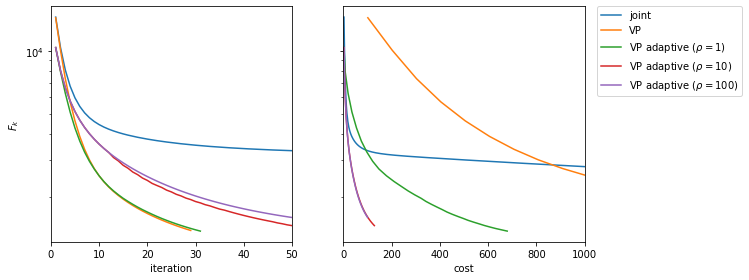

In [7]:
# plot convergence
fig, ax = vpns.plot_convergence([res1,res2,res3,res4,res5], ['joint','VP', r'VP adaptive ($\rho = 1$)',r'VP adaptive ($\rho = 10$)',r'VP adaptive ($\rho = 100$)'])
ax[0].set_xlim([0,50])
ax[1].set_xlim([0,1000])

fig.tight_layout()
fig.set_figwidth(15)

plt.savefig('./results/tomo1_convergence.eps',dpi=300,bbox_inches='tight')

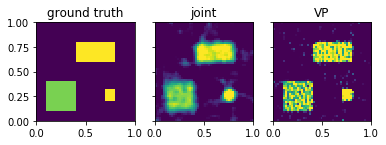

In [8]:
example1.plot_results([(xt,yt),(x1,y1),(y1,y2)],['ground truth','joint','VP'])
plt.savefig('./results/tomo1_final_reconstruction.eps',dpi=300,bbox_inches='tight')

## Example 2

In [9]:
k = 50
n = 50
m = 50
s = np.linspace(-1.5,1.5,m)
theta = np.linspace(0,2*np.pi,k)

rng = np.random.default_rng(seed=6)

yt = np.zeros((n,n))
yt[10:20,20:40] = 1
yt[30:45,5:20] = .8
yt[34:40,35:40] = 1.5
yt = yt.flatten()
xt = np.concatenate((.05*rng.normal(size=k),.05*rng.normal(size=k)))

# create instance
example2 = Tomography(s,theta,xt,yt,sigma=1)


# objective
f = lambda x,y : example1.misfit(x = x,y = y)
r1 = functions.dummy()
r2 = TV(n_=n,lambda_ = 2e1, maxit=10000)

# optimization parameters
Lyy = np.linalg.norm(example2.getA(xt),ord=2)**2
L = 1e6
Lb = 1e6
otol = (f(xt,yt) + r1.eval(xt) + r2.eval(yt))*1.1
itol = 1e-6
maxit = 100
rho = 1

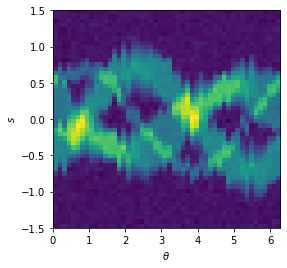

In [10]:
fig,ax=example1.plot_data()
plt.savefig('./results/tomo2_sinogram.eps',dpi=300,bbox_inches='tight')

In [11]:
# initial points
x0 = np.zeros(2*k)
y0 = example2.inner_solve(x0,np.zeros(n*n),rtol=1e-3,r2=r2)

/opt/anaconda3/lib/python3.7/site-packages/pyunlocbox/functions.py:701: RuntimeWarning: invalid value encountered in double_scalars
  rel_obj = np.abs(obj - prev_obj) / obj


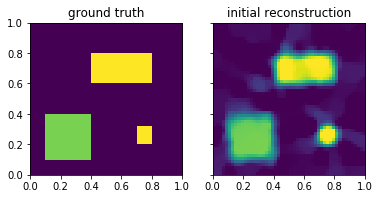

In [12]:
fig,ax = example2.plot_results([(xt,yt),(x0,y0)],['ground truth','initial reconstruction'])
plt.savefig('./results/tomo2_initial_reconstruction.eps',dpi=300,bbox_inches='tight')

In [13]:
# algorithm1
res1 = vpns.algorithm1(f,r1,r2,x0,y0,L=(L,L),tol=otol,maxit = 10*maxit)
x1 = res1['sol'][0]
y1 = res1['sol'][1]

# algorithm 2
res2 = vpns.algorithm2(f,r1,r2,x0,y0,L=(Lb,Lyy),tol=(otol,itol),maxit=(maxit,100))
x2 = res2['sol'][0]
y2 = res2['sol'][1]

# algorithm 3 adaptive, 1*rho
res3 = vpns.algorithm3(f,r1,r2,x0,y0,L=(Lb,Lyy),rho = 1*rho, tol=otol,maxit=(maxit,1000))
x3 = res3['sol'][0]
y3 = res3['sol'][1]

# algorithm 3 adaptive, 10*rho
res4 = vpns.algorithm3(f,r1,r2,x0,y0,L=(Lb,Lyy),rho = 10*rho, tol=otol,maxit=(maxit,1000))
x4 = res4['sol'][0]
y4 = res4['sol'][1]

# algorithm 3 adaptive, 100*rho
res5 = vpns.algorithm3(f,r1,r2,x0,y0,L=(Lb,Lyy),rho = 100*rho, tol=otol,maxit=(maxit,1000))
x5 = res5['sol'][0]
y5 = res5['sol'][1]

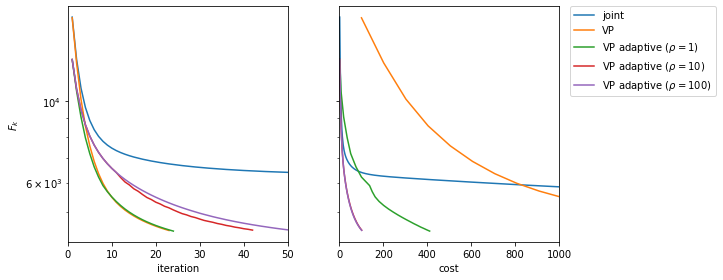

In [16]:
# plot convergence
fig, ax = vpns.plot_convergence([res1,res2,res3,res4,res5], ['joint','VP', r'VP adaptive ($\rho = 1$)',r'VP adaptive ($\rho = 10$)',r'VP adaptive ($\rho = 100$)'])
ax[0].set_xlim([0,50])
ax[1].set_xlim([0,1000])

fig.tight_layout()
fig.set_figwidth(15)

plt.savefig('./results/tomo2_convergence.eps',dpi=300,bbox_inches='tight')

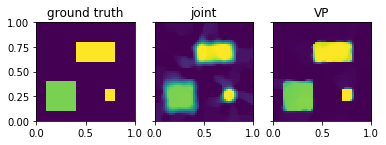

In [17]:
example2.plot_results([(xt,yt),(x1,y1),(x2,y2)],['ground truth','joint','VP'])
plt.savefig('./results/tomo2_final_reconstruction.eps',dpi=300,bbox_inches='tight')